In [13]:
import pickle

from station_hr_day_zipgatereg import *
from src.inference import *
from src.criticism import *

In [2]:
with open('/Users/nihaar/Documents/Fall19/ML_Probabilistic_Programming_Columbia/code/data/small_train_final_colab.pkl', 'rb') as f:
    data_samp = pickle.load(f)

In [14]:
test = data_samp.sample(frac=0.1, random_state=42)
data, features = feature_generation(test)
p = ZIPoissRegGate(features, data)


In [15]:
features

{'station': {'names': array(['station_2', 'station_3', 'station_4', 'station_5', 'station_6',
         'station_7', 'station_8', 'station_9', 'station_10', 'station_11',
         'station_12', 'station_13', 'station_14', 'station_16',
         'station_21', 'station_22', 'station_26', 'station_27',
         'station_28', 'station_29', 'station_30', 'station_31',
         'station_32', 'station_33', 'station_34', 'station_35',
         'station_36', 'station_37', 'station_38', 'station_39',
         'station_41', 'station_42', 'station_45', 'station_46',
         'station_47', 'station_48', 'station_49', 'station_50',
         'station_51', 'station_54', 'station_55', 'station_56',
         'station_57', 'station_58', 'station_59', 'station_60',
         'station_61', 'station_62', 'station_63', 'station_64',
         'station_65', 'station_66', 'station_67', 'station_68',
         'station_69', 'station_70', 'station_71', 'station_73',
         'station_74', 'station_75', 'station_76',

The model trained took a long time due to the number of parameters, so please use the trained params below

In [4]:
svi_posterior = get_svi_posterior(data['data'], data['demand'],
                                model = p.model,
                                  guide = p.guide,
                                  filename='models/svi_zip_params_station_plus_hr_day.pkl')

In [5]:
print(svi_posterior.information_criterion())

OrderedDict([('waic', tensor(625.6548, grad_fn=<SumBackward0>)), ('p_waic', tensor(16.6920, grad_fn=<SumBackward0>))])


In [35]:
post_samples = ppd_samples(
    p.wrapped_model,
    svi_posterior,
    data,
    ['obs'],
    num_samples=100)

In [19]:
svi_samples = {site: EmpiricalMarginal(svi_posterior, sites=site)
                     .enumerate_support().detach().cpu().numpy()
               for site in ['station_70_hour_0_weekday','station_70_hour_3_weekday','station_70_hour_6_weekday','station_70_hour_9_weekday']}

In [17]:
# def save_obj(obj, name ):
#     with open('obj/'+ name + '.pkl', 'wb') as f:
#         pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

# def load_obj(name ):
#     with open('obj/' + name + '.pkl', 'rb') as f:
#         return pickle.load(f)

# save_obj(svi_samples,'station_hr_posterior_samples')

with open('station_hr_posterior_samples.pkl', 'wb') as fp:
    pickle.dump(svi_samples, fp, protocol=pickle.HIGHEST_PROTOCOL)

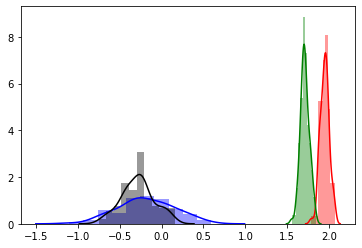

In [7]:
sns.distplot(svi_samples['station_59_hour_0_weekday'],color='blue')# would expect low (weekday midnight-3am)
sns.distplot(svi_samples['station_59_hour_9_weekday'],color='red') # expect high (9am weekday)
sns.distplot(svi_samples['station_70_hour_9_weekday'],color='green')# expect high (popular station)
sns.distplot(svi_samples['station_70_hour_6_weekend'],color='black') #would expect it to be low (weekend at 6-9am)

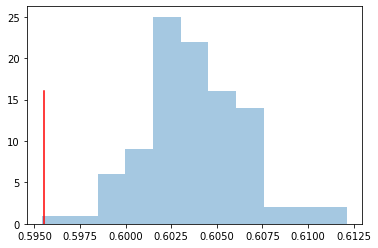

In [36]:
compare_test_statistic(data_samp.demand.values, post_samples[:,0,:],
                       stat=perc_0)

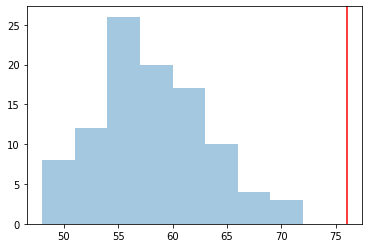

In [37]:
compare_test_statistic(data_samp.demand.values, post_samples[:, 0, :],
                       stat=max_)

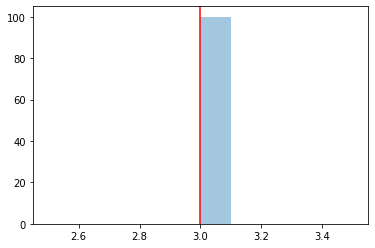

In [38]:
compare_test_statistic(data_samp.demand.values, post_samples[:, 0, :],
                       stat=percentile, q=80)

In [26]:
pss[0,:].shape
data_samp.demand.values.shape

(2014,)